## Analyzing Tabular Omics Data using Pandas DataFrames



## Working With A Feature Table of Microbial Counts


In this jupyter notebook we will do some basic graphing of a feature table of microbes by samples. We'll work with tabular data representing one of the microbiome change scenarios from the previous section. 

Here is the scenario in cartoon form:
<img src="./resources/Scenario_1_specific_pathogen_w_table-01.png" width="400"  description="A cartoon of multicolored microbes in 6 healthy people or 6 people with a disease. The picture shows 12 boxes (one per person). In each box there are multiple microbes of different types. A table below will list the counts of microbes in each sample if you cannot view them here."> 

### Representing Tabular Data in Text Form with `.csv` or `.tsv` files 

First, we need some data to work with. The data in a table like the one above - tabular data - can be represented in text files by using a letter or other character to mark where each column ends. This special character that marks the boundaries between columns is called a 'delimiter'. It's critical that whatever delimiter is chosen doesn't show up in the cells of the table itself, or else programs that read the file may become confused about where each entry in the table begins and ends. Therefore, most delimiters are chosen to be single characters that don't show up in the raw data. Common delimiters for tabular data saved as text files are either commas (`","`) or tabs (`"\t"` in python). Files that use a comma delimiter are often called `.csv` or comma-separated values files. Those that use tabs are called `.tsv` or tab-separated values files. Tab-separated values files commonly use `.tsv` or `.txt` file extensions. 

Personally, I usually prefer to use tab-separated values files where possible, because it's convenient if commas can still appear in tables (sometimes in 'Notes' sections) without messing up your ability to read the table into python. In contrast, I rarely need to represent tabs in my raw data. However, both `.csv` and `.tsv` files are used very commonly in bioinformatics.

## Download the raw data

A sample tab-separated values data file representing the table up above is available from GitHub. You can either download it by hand and save it into the same folder where your code is running, or you can use python code to do this automatically. If you are running the script in Google Colab, you should use the automatic download method.

**Option 1: Download the data by hand**.
Click on the link to the GitHub page for the raw data [here](https://github.com/zaneveld/full_spectrum_bioinformatics/blob/master/content/07_tabular_omics_data/resources/scenario1_otus_pandas.txt). Annoyingly, there isn't an obvious 'Download' button for data files stored on GitHub. However, you can still download the data. To do this, right-click (Windows) or two-finger click (MacOSX) on the 'Raw' button on the right side of the menu of the GitHub page, then pick 'Save Link as...'. Finally, when the save window pops up, carefully select the folder where you want to save the data. Typically, this will be the same as the directory from which you are running your Jupyter notebook.

**Option 2: Download the data directly using the `urlretrieve` function in python**.

In [24]:
#Import the urlretrieve function
from urllib.request import urlretrieve

#Save the looooong web address (url) of our data in a python string 
genome_url = 'https://raw.githubusercontent.com/zaneveld/full_spectrum_bioinformatics/master/content/07_tabular_omics_data/resources/scenario1_otus_pandas.txt'

#Set the name of the file where we want to save the data
#Note we can save the file under whatever name we want (e.g. I changed the extension from .txt to .tsv)
genome_file_name = 'scenario_1_otus_pandas.tsv'

#Download the data 
urlretrieve(genome_url, genome_file_name)

('scenario_1_otus_pandas.tsv', <http.client.HTTPMessage at 0x7fd900711ca0>)

### Checking that the raw data is present in our current directory

As a first step, let's check that we have 'scenario_1_otus_pandas.tsv' in our current working directory. The `listdir` function in the builtin `os` module returns a list of all contents of a specified directory on your computer.

It can be useful to run it prior to trying to open files if you need to remember filenames. Let's import the `listdir` function and quickly check that our data is there...

In [3]:
from os import listdir
print("Directory contents:",listdir())

Directory contents: ['scenario_1_otus_pandas.tsv', 'analyzing_tabular_omics_data_in_pandas.ipynb', 'resources', 'scenario_1_otus_pandas.txt', 'simulating_microbiome_sampling_depth.ipynb', 'tabular_omics_data.ipynb', '.ipynb_checkpoints']


### Troubleshooting Missing Files:  using `getcwd` to figure out where we are and move data there by hand

In this case, the scenario 1 data file seems to be present. If it wasn't we could always download it by hand (see above) and then move it to the folder where we are doing our analysis by hand. If we couldn't remember which folder we were running our Jupyter notebook from, we could always double check that with getcwd function from the `os` module, as shown below:

In [2]:
from os import getcwd

print("We are currently working in folder:",getcwd())

#Next we would copy our data file and move it to the folder represented by the path down below:

We are currently working in folder: /Users/zaneveld/Dropbox/Zaneveld_Lab_Organization/Projects/Full_Spectrum_Bioinformatics/full_spectrum_bioinformatics/content/07_tabular_omics_data


# Loading our data file into a `DataFrame` in python 

Great. Now that we've seen that the data is available, let's load it into python. The [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min) module in python is an extremely popular and widely used tool for representing tabular data in special data structures known as `DataFrames`. These `DataFrames` are based on a similar data structure in the R programming language. Basically, you can think of them as tables, with the ability to have labelled rows and columns. You can do things like look up particular rows or columns, find all the table entries that match some criteria (e.g. everything >0), or do math operations to columns of the table.

First, we need to load up our data. The `read_csv` function from `pandas` that will let us load our sample data into a `DataFrame` object. Despite the name, the `read_csv` function can read both comma-separated values files and tab-separated values files, you just need to use it's `sep` (short for separator) parameter to specify the delimiter used in your file if it isn't a comma.

Let's import the `read_csv` function, and use it to load our data, setting the `sep` parameter to "\t" (tab) since our file is a tab-separated values file.

In [4]:
from pandas import read_csv

#Load the text version of the table (a csv file) into python using pandas
feature_table = read_csv('scenario_1_otus_pandas.tsv',sep="\t")

Once we've seen that the table loaded, let's work on figuring out how pandas is representing it inside python. We'll use the type() function to work out what type of object our feature table is:

In [5]:
type(feature_table)

pandas.core.frame.DataFrame

It looks like our table of data has been loaded as a pandas `DataFrame`. `DataFrame` objects serve as a convenient and very powerful way to represent tabular data. They represent those data as a table with row and column labels. Subsets of the data along a row or column can be pulled out as pandas Series objects.

To examine the feature table in a Jupyter notebook, we can simply type the name of the variable that holds it on it's own line:


In [6]:
feature_table

,OTU_ID,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
0,OTU1,3,4,2,2,0,4,4,4,0,3,2,2
1,OTU2,4,1,3,4,1,3,3,3,4,1,1,4
2,OTU3,1,4,2,1,4,2,2,2,1,4,4,1
3,OTU4,2,3,0,1,2,0,1,2,3,0,2,1
4,OTU5,0,0,0,0,0,0,1,4,2,2,3,4


#### Setting the row labels

An important feature of pandas DataFrames is their index column. This serves as a set of unique row labels for each row in your data. Because we didn't specify an index column when we loaded our data we have to set it manually. We can do so with the dataframe's set_index method.

In [14]:
#Use OTU ID column to label each row
feature_table = feature_table.set_index('OTU_ID')

If we view the dataframe again, we should notice that the left hand column of numbers has dissapeared, and our rows are now correctly labelled by microbe

# Working with data in a pandas DataFrame

Now that are data is loaded into a pandas `DataFrame`, let's explore how we can work with our table of microbiome data. 

#### Accessing column data

We might want to access the rows or columns of our pandas data directly so that we can do calculations. A nice tutorial on this can be found here: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/.

In brief, we can select a column by indexing into the pandas DataFrame object using a column name. I currently have the patients as columns, so we could access them with `feature_table["patient1"]`

In [15]:
#Access a column 
print(feature_table["patient1"])

OTU_ID
OTU1    3
OTU2    4
OTU3    1
OTU4    2
OTU5    0
Name: patient1, dtype: int64


However, this way of selecting columns in pandas is a bit special-purpose - it doesn't always extend in the simplest way to rows for example.

**Try it yourself**: try accessing a column that doesn't exist. Try something ridiculous like `print(feature_table["zeppelin_sales"])`.

### A consistent way to access row or column data in pandas

An alternative way to index into a pandas DataFrame is by using the .loc indexer (accessed by the name of your dataframe and then .loc)

Note that this is not called like a function (so not 'df.loc('whatever')'), but more a way of indexing (closer to how you would call it if loc were a dict that was a property of the dataframe).

When using .loc, we specify what rows we want, then what columns we want. We can use the colon character to indicate 'all'. In this way we can do row and column selection using exactly the same syntax, which is nice for those of us who don't like to remember too many things.

(More info on this here: https://brohrer.github.io/dataframe_indexing.html)

#### Select a single column using `.loc`

Here's how we can use the DataFrame loc property to select a column by name:

In [28]:
#Recall that : means all, and we specify rows,columns when using .loc
print("Select all of the patient1 column:")
selected_column = feature_table.loc[:,'patient1']
print(selected_column)

Select all of the patient1 column:
OTU_ID
OTU1    3
OTU2    4
OTU3    1
OTU4    2
OTU5    0
Name: patient1, dtype: int64


Cool! So we see that we now get the count of all microbes in patient1's sample. However, this data type looks kinda funky. That's because it is a pandas Series object. It therefore doesn't print in the same way as either a pandas DataFrame or a python list. We'll talk more about that in a minute. For now, let's continue to explore how to select data using .loc.

#### Select a row from a pandas DataFrame with `.loc`


In [29]:
print("\nSelect the OTU1 row:")
selected_row = feature_table.loc['OTU1',:]
print(selected_row)




Select the OTU1 row:
patient1     3
patient2     4
patient3     2
patient4     2
patient5     0
patient6     4
patient7     4
patient8     4
patient9     0
patient10    3
patient11    2
patient12    2
Name: OTU1, dtype: int64


#### Select a single entry in our table using `.loc` by specifying the row and column names

We can combine these types of indices to access the value of a single cell

In [18]:
print("\nSelect one cell by specifying row and column:")
selected_row_and_column = feature_table.loc['OTU1','patient1']
print(selected_row_and_column)


Select one cell by specifying row and column:
3


Note that we can also use variables to hold our strings for the names of rows or columns to be select. This can be useful if dynamically determining which data to grab in more complex code. Here's a simple example:

In [19]:
print("\nSelect one cell by specifying row and column:")
row_name = 'OTU1'
column_name = 'patient1'
selected_row_and_column = feature_table.loc[row_name,column_name]
print(selected_row_and_column)



Select one cell by specifying row and column:
3


#### Testing what we get back when we select a pandas column or row.

We said up above that these pandas Series objects we got back from selecting row or columns of a dataframe don't look quite like either lists or DataFrames. In this case we know the result is a Series, but in cases like this where we don't already know the type of an object we can use the builtin type() function to check the type of any object in python. 

In [20]:
selected_column = feature_table.loc[:,'patient1']
selected_column_type = type(selected_column)

#WHAT IS THIS? Print the answer to screen
print("\nfeature_table['patient1'] is an object of type:", selected_column_type)


feature_table['patient1'] is an object of type: <class 'pandas.core.series.Series'>


Great, so we've now proven to ourselves that this is a pandas Series object. We can now do some Googling to find out more about this data type.

For example, this Beyond Data Science blog post has more in-depth information about pandas series objects: https://towardsdatascience.com/pandas-series-a-lightweight-intro-b7963a0d62a2. 

#### Do math to a Series object 

In general, mathematical operations done to a `Series` object are applied to all the individual elements of that `Series`. So if you add 1 to a particular `Series`, pandas will add 1 to each number in that series Additionally, many built-in functions that apply to lists, such as `sum`, also work on pandas `Series` objects.

Here's an example: a common thing we need to do to microbiome data is to convert it to log scale. This is helpful for plotting microbes with very different abundances (e.g. 3 and 3,000). If all our data were positive numbers, we could do this by importing the `log` function (the one in the numpy package works best with Series objects), and then running it on our data series. There's a problem though: some of our numbers are zero, and the log of zero is undefined. One common strategy is to add a *pseudocount* of 1 to all samples. This is an approximation, but it is commonly used to allow for calculation of logs in large datasets.

Let's try adding 1 to all numbers, then taking the log of one column of our microbiome data.



In [39]:
#numpy is a common package for working with arrays
#it has lots of math functions that also work well
#with pandas series objects
from numpy import log

#Select the patient1 column of our DataFrame
OTU1_data = feature_table.loc[:,"patient1"]

log_patient1_data = log(patient1_data +1)

print("Log(patient1 data):", log_patient1_data)


Log(patient1 data): OTU_ID
OTU1    1.386294
OTU2    1.609438
OTU3    0.693147
OTU4    1.098612
OTU5    0.000000
Name: patient1, dtype: float64


#### Getting a list out of a pandas Series object

Let's say we don't want to work with the data as a series, but instead to convert it to a list. We can do that using the builtin list() function.
        

In [21]:
patient1_data = list(feature_table.loc[:,"patient1"])
print(patient1_data)

[3, 4, 1, 2, 0]


#### Getting a numpy array object out of a pandas Series object

an alternative way of getting numeric data out of a pandas Series object is by calling its .values property, which returns a numpy array of the data.

NOTE: values is a *property* (data stored in the object) not a *method* (function associated with the object. The main reason this matters is because if you call .values() with parentheses by accident, you will get an error

In [22]:
patient1_data_as_array = feature_table.loc[:,"patient1"].values
print("Data as a numpy array:",patient1_data_as_array)

Data as a numpy array: [3 4 1 2 0]


#### Filter rows of a pandas dataframe by column values

Let's say we want just the patients *without* OTU5 or *without* OTU4. In that case we can use a condition within our .loc selection. A vertical bar | should be read as 'or'. 

In [23]:
columns_to_grab = (feature_table.loc['OTU5',:] == 0) | (feature_table.loc['OTU4',:] == 0)

feature_table.loc[:,columns_to_grab]

,patient1,patient2,patient3,patient4,patient5,patient6,patient10
OTU_ID,,,,,,,
OTU1,3,4,2,2,0,4,3
OTU2,4,1,3,4,1,3,1
OTU3,1,4,2,1,4,2,4
OTU4,2,3,0,1,2,0,0
OTU5,0,0,0,0,0,0,2


Notice that the above feature table now has only columns that have a 0 count in their entry in the OTU5 or OTU4 row. 

#### Rendering DataFrames as HTML

In a Jupyter Notebook, DataFrames can be rendered simpy by typing the variable name holding them on it's own line. However, if working outside of Jupyter notebooks it can be useful to know how to generate HTML versions of these tables where needed. This is shown below:

In [23]:
#Converting it to HTML to show it
feature_table_to_show = feature_table.to_html()

#Show the HTML
from IPython.display import HTML
feature_table_as_html = HTML(feature_table_to_show)
feature_table_as_html

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


## Styling Pandas dataframes 

Pandas dataframes can be [styled](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) in several ways to highlight values of interest. We can use this styling to provide a quick heatmap-like coloring to a pandas table:

In [24]:
#Set the feature table display style
#to use a background gradient based on values.
feature_table_visualization = feature_table.style.background_gradient(cmap='Blues')
feature_table_visualization

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


**Note**: this styling won't appear on GitHub, so you may need to try it for yourself to see the coloring.

### Graphing pandas DataFrames using heatmaps

One of the advantages of pandas DataFrames is that they integrate well with many other commonly used visualization and statistics packages in python. If we want a true heatmap that, for example, clusters rows and columns by similarity we will need to step outside of the pandas module alone and combine it with the [Seaborn](https://seaborn.pydata.org/) graphing package. 

[Seaborn](https://seaborn.pydata.org/) is a graphing package built on top of [matplotlib](https://matplotlib.org/1.3.1/index.html). It integrates smoothly with pandas, and the two are commonly used together. 

The clustermap function in seaborn is a convenient way to make a heatmap of our data, clustered according to the similarity of rows and columns. In this chart the rows will be the different microbes, the columns will be the patients, and the color of each cell will represent the count of microbes in each patient. The order of the  rows and columns will reflect the similarity of their counts.

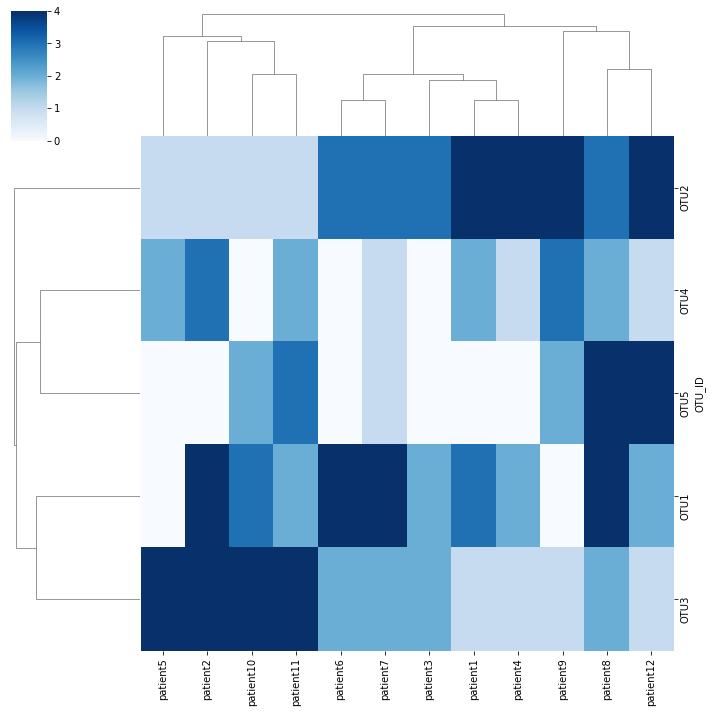

In [25]:
%matplotlib inline
from seaborn import clustermap
clustermap(feature_table,cmap="Blues")

If we don't want to cluster the data, and just want a basic heatmap, we can set the row_cluster and col_cluster parameters to False.

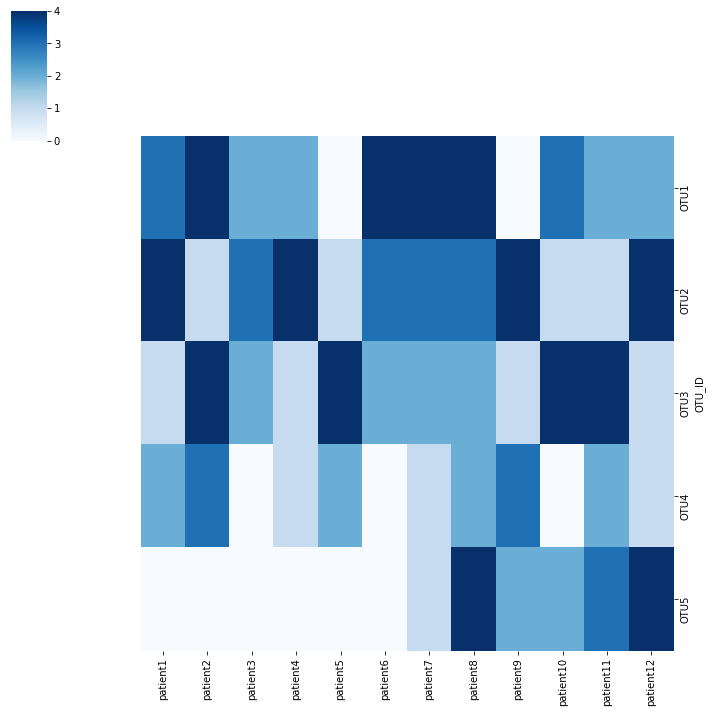

In [26]:
clustermap(feature_table,row_cluster=False,col_cluster=False,cmap="Blues")

If we wanted to swap the rows and columns, we could use the pandas DataFrame method .transpose() to swap the rows and columns of the DataFrame, and then rerun the clustermap on the transposed data. We can also separately control clustering of rows and columns with the row_cluster and col_cluster parameters. Finally, we can change the color mapping or 'cmap' using the cmap paramter. 

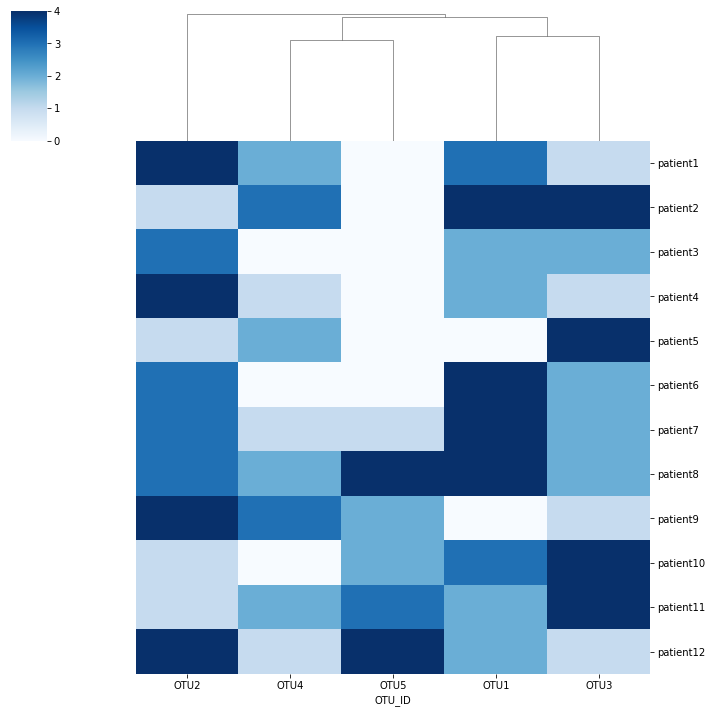

In [27]:
feature_table_transposed = feature_table.transpose()
clustermap(feature_table_transposed, row_cluster=False,col_cluster=True,cmap='Blues')

## Calculating Microbiome Richness using Pandas DataFrames  

Next we will calculate the alpha diversity in this dataset. This is equivalent to calculating how many species are represented in each with counts > 0. (We'll leave aside for the moment important concerns about normalization)

In [28]:
#First look up the names of all the samples (so all the column names)
print(feature_table.columns.values)

['patient1' 'patient2' 'patient3' 'patient4' 'patient5' 'patient6'
 'patient7' 'patient8' 'patient9' 'patient10' 'patient11' 'patient12']


#### A solution for calculating alpha diversity using for loops

One way we might calculate alpha diversity is using for loops. The approach is:

- grab each column 
- iterate over the rows
- if a row is non-zero add 1 to the alpha diversity of that column
- print (or yield) the alpha diversity for the current column before moving on to the next one.

You can think of this as a'traditional' approach that doesn't rely on much of pandas special functionality other than a single step where we grab our column of interest.

In [29]:
adiv_by_patient = {}
for patient in feature_table.columns.values:
    adiv = 0   
    patient_otus = feature_table.loc[:,patient]
    for otu_count in patient_otus :
        if otu_count > 0:
            adiv += 1            
    print(f"{patient}: {adiv}")
    adiv_by_patient[patient] = adiv
    


patient1: 4
patient2: 4
patient3: 3
patient4: 4
patient5: 3
patient6: 3
patient7: 5
patient8: 5
patient9: 4
patient10: 4
patient11: 5
patient12: 5


A related solution uses conditional indexing to find all cells that have a value above 0 and set it to 1. This effectively converts the table to a presence/absence table. One can then use the built in sum function to add up the columns:

In [30]:
#Convert all values above 0 to 1
feature_table[feature_table >0] = 1
#Sum along the columns
feature_table.sum()

patient1     4
patient2     4
patient3     3
patient4     4
patient5     3
patient6     3
patient7     5
patient8     5
patient9     4
patient10    4
patient11    5
patient12    5
dtype: int64

Note that this is not at all the only way to calculate this quantity. For example, if you are familiar with the numpy python library, a similar effect can be achiveved by extracting a numpy array from the feature table, using the numpy where function to set all non-zero cells to 1 and then using the numpy sum function to sum down the colums.

## Conclusion

Although tabular data can have many origins, the steps for analyzing it are often similar. Pandas DataFrames present a powerful and very widely used tool for analyzing tabular data in python.

## Exercises

The exercises for this chapter will 
1. **Normalizing a table**. Write a function that *normalizes* a table of species counts expressed as a pandas DataFrame. To normalize the table, calculate the sum of each column (assuming the columns are the samples), and divide each entry by its column sum. For example, patient6 has values 4,3, and 2 for a total of 9 counts. Expressed as proportions these would be 4/9, 3/9, and 2/9 or ~0.444, ~0.333, and ~0.222. Hint: you will need to 

2. **Calculating Shannon's Diversity Index**. Shannon's Diversity Index (H) is a measure of alpha diversity in ecological communities that incorporates elements of both richness and evenness (see e.g. this [post](http://www.tiem.utk.edu/~gross/bioed/bealsmodules/shannonDI.html)). Mathematically it is straightforward to calculate: iterate over all the species in a community. One by one, multiply each species' proportion in the community by the natural log of that proportion (p * ln(p)). Sum up the result and multiply it by -1. Or if you prefer here is the same statement put into mathematical notation: \begin{equation*}H = -\sum_{i=1}^n p_i*ln(p_i)  \end{equation*} Write a function that calculates Shannon's Diversity Index on microbial community data expressed as a table. Check that your calculation is working correctly by comparing against a hand-calculated result. For example, patient6 has values 4,3, and 2 for a total of 9 counts. Expressed as proportions these would be 4/9, 3/9, and 2/9. So the Shannon diversity would be -1 * ((4/9)*ln(4/9) + (3/9)*ln(3/9) + (2/9)*ln(2/9)) or  ~1.06.

3. **Short answer:** Do you think incorporating elements of both richness and evenness in a single measure is an advantage, or would you prefer this information in separate measures? What might be a situation where one approach is preferred over the other?

 

## Project Ideas

**Study the alpha diversity of a group over time using fossil data and pandas**. The Paleobiology Database ([paleobiodb.org](https://paleobiodb.org/#/)) let's you visualize and filter fossil data for different groups of animals over time. Filtering and then using the chart icon on the left let's you visualize alpha diversity over time for a given group. Download the raw data for your taxon of interest as a .csv file. Opening it in Excel you will notice the first ~15 rows have header info that needs to be trimmed off for pandas to read the file. After that there are many columns of data describing each fossil. Pay particular attention to the max_ma and min_ma columns: these represent the maximum and minimum number of millions of years ago that each fossil was found. Use table filtering to gather data according to some category of interest: the different groups within your taxon, fossils found on different continents, etc, and compare alpha diversity between them. Extend your method to use rarefaction (random subsampling) to normalize the number of counts between categories so that your total is not artifactually influenced by sampling depth. You can also try plotting the diversity of your different categories over time to try to understand major events (migration, meteor impacts, etc) that might have caused extinctions within your group. 

## [Reading Responses & Feedback](https://docs.google.com/forms/d/e/1FAIpQLSeUQPI_JbyKcX1juAFLt5z1CLzC2vTqaCYySUAYCNElNwZqqQ/viewform?usp=pp_url&entry.2118603224=Working+with+Tabular+'Omic+data+in+Python+using+Pandas)

## Further Reading

[1] DataQuest intro to Pandas for Data Analysis using IGN video game reviews [link](https://www.dataquest.io/blog/pandas-python-tutorial/)

[2] The Pandas API reference for DataFrames and Data Series [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html). This contains lists of useful methods and their documentation.



